### Today concepts
1. Multi Linear Regression(applying linear regression with multiple features)
2. Polynomial Regression(Polynomial Features)

#### Multi Linear Regression
    Applying linear regression algorithm with multiple features

**prediction of  the house price of boston dataset**

**1.Get the data**

In [1]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [77]:
import pandas as pd

In [7]:
df = pd.DataFrame(data['data'])
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [9]:
df.columns = data['feature_names']
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [10]:
df['target'] = data['target']
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [11]:
df.shape

(506, 14)

**2.Pre-processing**

In [12]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


I am taking RM column randomly as my feature.


and we check the performance of the model.
if performance not good we improve the model.

In [14]:
X = df[['RM']]
y = df['target']

it is better to seperate the data for training data and testing data


we can say 70% data for training and 30% data for testing


we have 506 rows available

in that how many rows for training and how many rows testing

In [17]:
70*506/100

354.2

In [16]:
506-354

152

In [18]:
from sklearn.model_selection import train_test_split

syntax
```
X_train,X_test,y_train,y_test   = train_test_split(X,y,train_size=0.7)
```

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [20]:
X_train.shape

(354, 1)

In [21]:
X_test.shape

(152, 1)

**train the model**

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**testing**

In [25]:
print('training score',model.score(X_train,y_train)*100)

training score 49.34597415745567


In [26]:
print('testing score',model.score(X_test,y_test)*100)

testing score 46.515861165195375


**Improve the model**

above score very low so we want to improve the model

1. by giving more examples
2. by taking different features 
3. by parameter tuning

#### improving score by different feature selection

df.corr()
    gives co relation between the features
    
    
if corelation values near to 1 then we can say positive linearity

if corelation near to -1 then we can say -ve linearity


if corelation 0 then we can say there is no relation

In [27]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


RM --->   0.69

LSTAT ---> -0.737663

we can take RM & LSTAT as features and again check performance.

if not uptomark we can re improve the model

In [28]:
X = df[['RM','LSTAT']]
y = df['target']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [31]:
X_train.shape

(354, 2)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print('training score',model.score(X_train,y_train)*100)
print('testing score',model.score(X_test,y_test)*100)

training score 64.01414704976978
testing score 63.395253120007396


In [78]:
import seaborn as sns

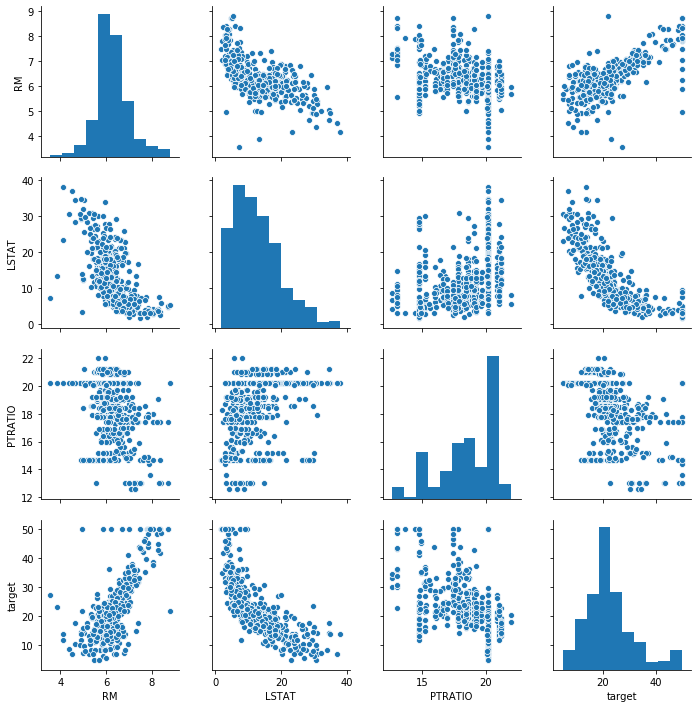

In [36]:
sns.pairplot(df[['RM','LSTAT','PTRATIO','target']])

**again improve the model by taking features of RM , LSTAT,PTRATIO**

In [38]:
X = df[['RM','LSTAT','PTRATIO']]
y = df['target']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print('training score',model.score(X_train,y_train)*100)
print('testing score',model.score(X_test,y_test)*100)

training score 70.76065534339756
testing score 61.83417461906052


### Applying polynomial features to linear regression

**underfitting**
    model not able to recognize the pattern(student not able to learn from the training data)
    
**Overfitting**
    model capturing all the points in training(not recognizing the pattern) but failed in testing
    
**best fit**
    model recognizing pattern and giving good performance in training and testing

**prediction of salary of employee with his experience**

without polynomial features and with polynomial features and observe the scores

**1.Get the data**

In [42]:
experience = [0,1,2,3,4,5,6,7,8]

salary = [5000,6000,7000,8000,15000,25000,40000,55000,80000]
df = pd.DataFrame({'experience':experience,'salary':salary})
df

,experience,salary
0,0,5000
1,1,6000
2,2,7000
3,3,8000
4,4,15000
5,5,25000
6,6,40000
7,7,55000
8,8,80000


**2. pre-processing**

In [43]:
df.shape

(9, 2)

In [44]:
df.isna().sum()

experience    0
salary        0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
experience    9 non-null int64
salary        9 non-null int64
dtypes: int64(2)
memory usage: 184.0 bytes


In [48]:
X = df[['experience']]
y = df['salary']

7 rows data for training and 2 rows data for testing

In [49]:
df

,experience,salary
0,0,5000
1,1,6000
2,2,7000
3,3,8000
4,4,15000
5,5,25000
6,6,40000
7,7,55000
8,8,80000


In [50]:
X_train = X.head(7)
X_test = X.tail(2)
y_train = y.head(7)
y_test = y.tail(2)

In [51]:
X_train.shape,X_test.shape

((7, 1), (2, 1))

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
print('training score',model.score(X_train,y_train)*100)

training score 79.9249859786876


In [55]:
print('testing score',model.score(X_test,y_test)*100)

testing score -466.47551020408207


In [57]:
import matplotlib.pyplot as plt

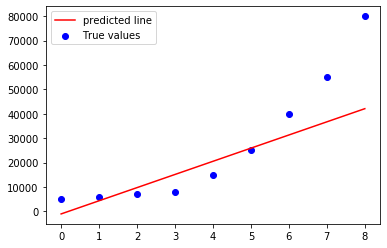

In [59]:
plt.figure()

plt.scatter(df['experience'],df['salary'],c='blue',label='True values')
plt.plot(df['experience'],model.predict(X),c='red',label='predicted line')
plt.legend()

plt.show()

### applying polynomial features for linear regression

1.Get the data

In [60]:
experience = [0,1,2,3,4,5,6,7,8]

salary = [5000,6000,7000,8000,15000,25000,40000,55000,80000]
df = pd.DataFrame({'experience':experience,'salary':salary})
df

,experience,salary
0,0,5000
1,1,6000
2,2,7000
3,3,8000
4,4,15000
5,5,25000
6,6,40000
7,7,55000
8,8,80000


In [61]:
df.isna().sum()

experience    0
salary        0
dtype: int64

In [62]:
X = df[['experience']]
y = df['salary']

In [63]:
X_train = X.head(7)
X_test = X.tail(2)
y_train = y.head(7)
y_test = y.tail(2)

**steps for applying polynomial features**

In [64]:
# import the polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [65]:
# create the object by proving higher order degree
poly = PolynomialFeatures(degree=2)

we have to transform the features/input into higher order degree

syntax
```
X_poly_train = poly.fit_trasform(X_train)
X_poly_test = poly.transform(X_test)
```

In [66]:
X_poly_train = poly.fit_transform(X_train)

In [67]:
X_poly_test = poly.transform(X_test)

**Train the model**

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model = LinearRegression()
model.fit(X_poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
print('training score',model.score(X_poly_train,y_train)*100)

training score 98.77079828005235


In [72]:
print('testing score',model.score(X_poly_test,y_test)*100)

testing score 87.91836734693888


In [73]:
import matplotlib.pyplot as plt

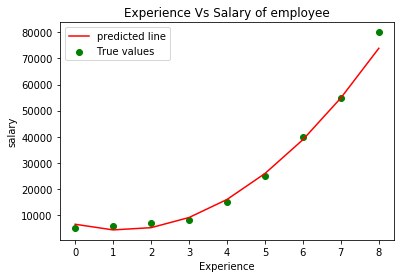

In [76]:
plt.figure()
plt.scatter(df['experience'],df['salary'],c='green',label='True values')
plt.plot(df['experience'],model.predict(poly.transform(X)),c='red',label='predicted line')
plt.xlabel('Experience')
plt.ylabel('salary')
plt.title('Experience Vs Salary of employee')
plt.legend()
plt.show()

**Task**

**Improve the score of the model of boston dataset**